<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#вывод датасета
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
#получение общей информации
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
df.shape

(23699, 22)

### Вывод

Файл содержит пустые значения, которые необходимо обработать, кроме того, в некоторых столбцах, для удобства обработки, следует изменить тип данных

## Предобработка данных

Исследование и обработка пустых значений

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбце с балконами можно объяснить отсутствием балконов в квартире, заменим пустые значения на 0

In [6]:
df['balcony'] = df['balcony'].fillna(0)

Пустые значения в столбце is_apartment могли возникнуть в связи с тем, что это не апартаменты

In [7]:
df['is_apartment'] = df['is_apartment'].fillna(0)

Удаление пустых значений в столбцах locality_name и floors_total не сильно повлияет на данные

In [8]:
df.dropna(subset=['locality_name', 'floors_total'], inplace=True)

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пустые значения в столбцах parks_around3000 и ponds_around3000 говорят о том, что поблизости отсутсвуют парки, либо водоемы, необходимо заменить такие значения нулями, а также поменять тип данных на целочисленный

In [10]:
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')

In [11]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,0,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,0,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,0,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,0,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,0,...,8.50,0.0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,0,...,NaN,0.0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,0,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


обработка типов с временем

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,0,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,0,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,0,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,0,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,0,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,0,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,0,...,8.50,0.0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,0,...,NaN,0.0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,0,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


In [14]:
def func_to_area(pair, mini_data, data, column_name):
    median = mini_data[column_name].median()
    data.loc[(data['rooms'] == pair[0]) & (data['locality_name'] == pair[1]), column_name] =  data.loc[
        (data['rooms'] == pair[0]) & (data['locality_name'] == pair[1]), column_name
    ].fillna(median)

In [15]:
for pair, mini_data in df.groupby(['rooms', 'locality_name']):
    func_to_area(pair, mini_data, df, 'living_area')
    func_to_area(pair, mini_data, df, 'kitchen_area')

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [16]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                55
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              243
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пустые значения в столбце days_exposition объясняются тем, что объявление еще не сняли с публикации, не будем удалять пустые значения в этом столбце

Пустые значения столбце living_area целесообразно заменить медианными значениями жилой площади квартир с таким же количеством комнат и находящихся в том же регионе

In [17]:
#странно, что после такого перебора остались пустые значения в этих столбцах, но их не так много, можно и удалить
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                55
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              243
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [18]:
df = df.dropna(subset=['living_area', 'kitchen_area']).reset_index(drop=True)

Необходимо поменять тип данных на целочисленный в столбцах с общей площадью квартиры, числом этажей, ценой, жилой площадью, площадью кухни и числом балконов. В этих столбцах не нужна точность до десятых долей

In [19]:
sheet = ['total_area', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'last_price']
for name in sheet:
    df[name] = df[name].astype('int')

In [20]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,0,...,25,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40,2018-12-04,1,NaN,11,18,1,0,...,11,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56,2015-08-20,2,NaN,5,34,4,0,...,8,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159,2015-07-24,3,NaN,14,45,9,0,...,10,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,0,...,41,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23307,9,9700000,133,2017-03-21,3,3.70,5,73,3,0,...,13,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23308,14,3100000,59,2018-01-15,3,NaN,5,38,4,0,...,8,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23309,18,2500000,56,2018-02-11,2,NaN,3,29,1,0,...,8,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23310,13,11475000,76,2017-03-28,2,3.00,17,31,12,0,...,23,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


In [21]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8930
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5393
cityCenters_nearest      5370
parks_around3000            0
parks_nearest           15310
ponds_around3000            0
ponds_nearest           14344
days_exposition          3150
dtype: int64

Обработаем пропуски в стоблце с высотой потолков, высота потолков зависит от климатических условий в конкретном районе,
заменим пустые значения на среднюю высоту потолков в населенном пункте

In [22]:
for region, mini_data in df.groupby('locality_name'):
    ceil_height = mini_data['ceiling_height'].median()
    df.loc[df['locality_name'] == region, 'ceiling_height'] = df.loc[
        df['locality_name'] == region, 'ceiling_height'
    ].fillna(ceil_height)

In [23]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             96
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5393
cityCenters_nearest      5370
parks_around3000            0
parks_nearest           15310
ponds_around3000            0
ponds_nearest           14344
days_exposition          3150
dtype: int64

Оставшиеся пустые значения возникли в связи с тем, что невозможно было посчитать среднее значение для этого региона, эти пустые значения можно удалить, кроме того, необходимо округлить до десятых долей значения в этом столбце

In [24]:
df.dropna(subset=['ceiling_height'], inplace=True)

In [25]:
df['ceiling_height'] = round(df['ceiling_height'],1)

Вывод: Где необходимо, обработаны пустые значения, высота потолков заменена на среднюю высоту потолков по региону, для удобства обработаны типы данных. Пустые значения в столбцах с жилой площадью и площадью кухни заменены на медианную площадь квартиры с таким же количеством комнат в том же регионе

## Исследовательский анализ данных

Расчет цены за квадратный метр

In [26]:
df['price_for_metres'] = (df['last_price'] / df['total_area']).astype('int')

In [27]:
df = df.reset_index(drop=True)

Описание дней недели и создание таблицы словаря

In [28]:
df['weekday_publication'] = df['first_day_exposition'].dt.weekday
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metres,weekday_publication
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,0,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3
1,7,3350000,40,2018-12-04,1,2.6,11,18,1,0,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,83750,1
2,10,5196000,56,2015-08-20,2,2.7,5,34,4,0,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3
3,0,64900000,159,2015-07-24,3,2.7,14,45,9,0,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,0,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23211,9,4600000,62,2016-08-05,3,2.6,9,40,8,0,...,Петергоф,45602.0,34104.0,1,352.0,1,675.0,239.0,74193,4
23212,9,9700000,133,2017-03-21,3,3.7,5,73,3,0,...,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN,72932,1
23213,14,3100000,59,2018-01-15,3,2.5,5,38,4,0,...,Тосно,NaN,NaN,0,NaN,0,NaN,45.0,52542,0
23214,13,11475000,76,2017-03-28,2,3.0,17,31,12,0,...,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,150986,1


In [29]:
def weekday_name(value):
    sheet = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
    return sheet[value]

In [30]:
df['weekday_name'] = df['weekday_publication'].apply(weekday_name)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metres,weekday_publication,weekday_name
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,0,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,четверг
1,7,3350000,40,2018-12-04,1,2.6,11,18,1,0,...,12817.0,18603.0,0,NaN,0,NaN,81.0,83750,1,вторник
2,10,5196000,56,2015-08-20,2,2.7,5,34,4,0,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,четверг
3,0,64900000,159,2015-07-24,3,2.7,14,45,9,0,...,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,пятница
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,0,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,вторник
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23211,9,4600000,62,2016-08-05,3,2.6,9,40,8,0,...,45602.0,34104.0,1,352.0,1,675.0,239.0,74193,4,пятница
23212,9,9700000,133,2017-03-21,3,3.7,5,73,3,0,...,24665.0,4232.0,1,796.0,3,381.0,NaN,72932,1,вторник
23213,14,3100000,59,2018-01-15,3,2.5,5,38,4,0,...,NaN,NaN,0,NaN,0,NaN,45.0,52542,0,понедельник
23214,13,11475000,76,2017-03-28,2,3.0,17,31,12,0,...,39140.0,10364.0,2,173.0,3,196.0,602.0,150986,1,вторник


In [31]:
week_dict = df.loc[:, ['weekday_publication','weekday_name']].drop_duplicates().sort_values(
    by='weekday_publication'
).reset_index(drop=True)
week_dict

,weekday_publication,weekday_name
0,0,понедельник
1,1,вторник
2,2,среда
3,3,четверг
4,4,пятница
5,5,суббота
6,6,воскресенье


In [32]:
#Удаление столбца с названиями дней недели
del df['weekday_name']

Составление столбца с информацией о месяце размещения объявления о продаже, также составление таблицы словаря

In [33]:
df['month_publication'] = df['first_day_exposition'].dt.month
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metres,weekday_publication,month_publication
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,0,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3
1,7,3350000,40,2018-12-04,1,2.6,11,18,1,0,...,12817.0,18603.0,0,NaN,0,NaN,81.0,83750,1,12
2,10,5196000,56,2015-08-20,2,2.7,5,34,4,0,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8
3,0,64900000,159,2015-07-24,3,2.7,14,45,9,0,...,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,7
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,0,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23211,9,4600000,62,2016-08-05,3,2.6,9,40,8,0,...,45602.0,34104.0,1,352.0,1,675.0,239.0,74193,4,8
23212,9,9700000,133,2017-03-21,3,3.7,5,73,3,0,...,24665.0,4232.0,1,796.0,3,381.0,NaN,72932,1,3
23213,14,3100000,59,2018-01-15,3,2.5,5,38,4,0,...,NaN,NaN,0,NaN,0,NaN,45.0,52542,0,1
23214,13,11475000,76,2017-03-28,2,3.0,17,31,12,0,...,39140.0,10364.0,2,173.0,3,196.0,602.0,150986,1,3


In [34]:
def month_name(value):
    sheet = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
    return sheet[value - 1]

In [35]:
df['month_name'] = df['month_publication'].apply(month_name)

In [36]:
month_dict = df.loc[:, ['month_publication', 'month_name']].drop_duplicates().sort_values(
    by='month_publication').reset_index(drop=True)
month_dict

,month_publication,month_name
0,1,январь
1,2,февраль
2,3,март
3,4,апрель
4,5,май
5,6,июнь
6,7,июль
7,8,август
8,9,сентябрь
9,10,октябрь


In [37]:
del df['month_name']

Создание столбца с годом публикации объявления

In [38]:
df['year_exposition'] = df['first_day_exposition'].dt.year

In [39]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_metres,weekday_publication,month_publication,year_exposition
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,0,...,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019
1,7,3350000,40,2018-12-04,1,2.6,11,18,1,0,...,18603.0,0,NaN,0,NaN,81.0,83750,1,12,2018
2,10,5196000,56,2015-08-20,2,2.7,5,34,4,0,...,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015
3,0,64900000,159,2015-07-24,3,2.7,14,45,9,0,...,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,0,...,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23211,9,4600000,62,2016-08-05,3,2.6,9,40,8,0,...,34104.0,1,352.0,1,675.0,239.0,74193,4,8,2016
23212,9,9700000,133,2017-03-21,3,3.7,5,73,3,0,...,4232.0,1,796.0,3,381.0,NaN,72932,1,3,2017
23213,14,3100000,59,2018-01-15,3,2.5,5,38,4,0,...,NaN,0,NaN,0,NaN,45.0,52542,0,1,2018
23214,13,11475000,76,2017-03-28,2,3.0,17,31,12,0,...,10364.0,2,173.0,3,196.0,602.0,150986,1,3,2017


Проставление этажа, на котором располагается квартира

In [40]:
def floor(row):
    floor = row['floor']
    total_floors = row['floors_total']
    if floor == 1:
        return'первый'
    elif floor == total_floors:
        return 'последний'
    else:
        return 'другой'

In [41]:
df['floor_information'] = df.apply(floor, axis=1)

Добавление к таблице столбцов с соотношениями жилой и общей площади, а также площади кухни к общей.

In [42]:
df['living_to_total'] = round(df['living_area'] / df['total_area'], 2)
df['kitchen_to_total'] = round(df['kitchen_area'] / df['total_area'], 2)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_metres,weekday_publication,month_publication,year_exposition,floor_information,living_to_total,kitchen_to_total
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,0,...,2,755.0,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40,2018-12-04,1,2.6,11,18,1,0,...,0,NaN,81.0,83750,1,12,2018,первый,0.45,0.28
2,10,5196000,56,2015-08-20,2,2.7,5,34,4,0,...,2,574.0,558.0,92785,3,8,2015,другой,0.61,0.14
3,0,64900000,159,2015-07-24,3,2.7,14,45,9,0,...,3,234.0,424.0,408176,4,7,2015,другой,0.28,0.06
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,0,...,1,48.0,121.0,100000,1,6,2018,другой,0.32,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23211,9,4600000,62,2016-08-05,3,2.6,9,40,8,0,...,1,675.0,239.0,74193,4,8,2016,другой,0.65,0.13
23212,9,9700000,133,2017-03-21,3,3.7,5,73,3,0,...,3,381.0,NaN,72932,1,3,2017,другой,0.55,0.10
23213,14,3100000,59,2018-01-15,3,2.5,5,38,4,0,...,0,NaN,45.0,52542,0,1,2018,другой,0.64,0.14
23214,13,11475000,76,2017-03-28,2,3.0,17,31,12,0,...,3,196.0,602.0,150986,1,3,2017,другой,0.41,0.30


Построение гистограм, для исследования распределений по площади, цене, числу комнат, высоте потолков

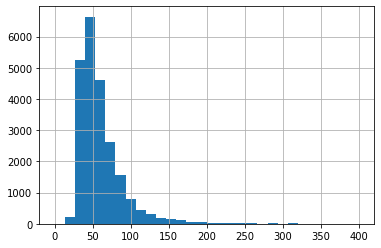

In [43]:
df['total_area'].hist(bins=30, range=(0, 400))

Гистограма площади недвижимости напоминает распределение Пуассона, посмотрим, какие могут быть слишком большие и слишком маленькие значения площади

In [44]:
print('Максимальная площадь недвижимости {} квадратных метров'.format(df['total_area'].max()))
print('Минимальная площадь недвижимости {} квадратных метров'.format(df['total_area'].min()))

Максимальная площадь недвижимости 900 квадратных метров
Минимальная площадь недвижимости 12 квадратных метров


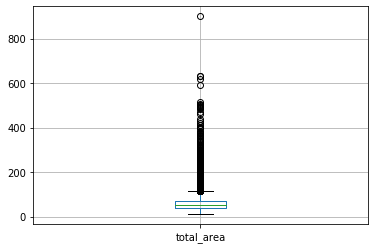

In [45]:
df.boxplot(column='total_area')


После исследования диаграммы размаха можно прийти к выводу, что выбросов очень много, позже мы избавимся от части из них, оставив таблице только недвижимость площадью меньше 350 квадратных метров, 

In [46]:
filtred_for_area = df.query('total_area <= 350')

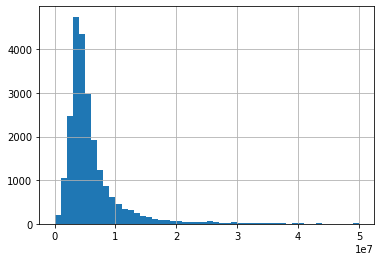

In [47]:
df['last_price'].hist(bins=50, range=(0, 50000000))

Гистограма цен на квартиры так же напоминает распределение Пуассона, определим границу выбросов, построив диаграмму размаха

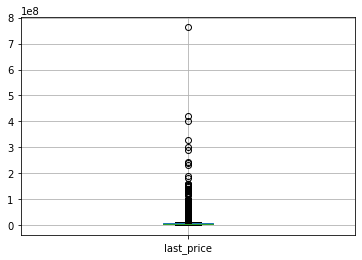

In [48]:
df.boxplot(column='last_price')


Чтобы избежать потери данных оставим в таблице только квартиры, которые стоят меньше 20 миллионов

In [49]:
filtred_by_price = df.query('last_price < 20000000')

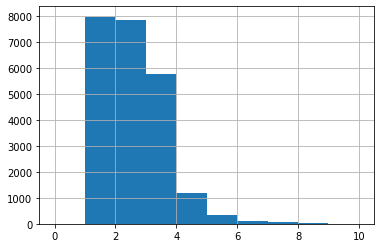

In [50]:
df['rooms'].hist(bins=10,range=(0, 10))

Из гистограмы можно сделать вывод, что квартиры в которых больше 6 комнат уже большая редкость, эти значения можно удалить

In [51]:
filtred_by_rooms = df.query('rooms <= 6')


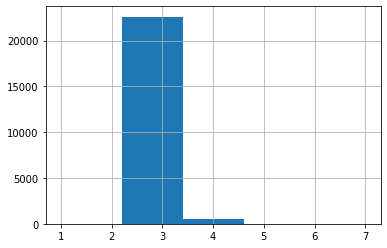

In [52]:
df['ceiling_height'].hist(bins=5,range=(1,7))

Высота потолков примерно одинаковая везде, это связано с тем, что мы заполнили очень много пустых значений в этом столбце
но все же ест и выбивающиеся значения, это потолки, которые выше, чем 3.5 метра

In [53]:
filtred_by_ceil = df.query('ceiling_height <= 3.5')
filtred_by_ceil.shape

(22913, 29)

Изучение времени продажи квартиры

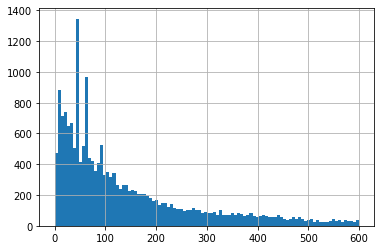

In [54]:
df['days_exposition'].hist(bins=100, range=(0, 600))

In [55]:
df['days_exposition'].mean()

181.7175211548034

In [56]:
df['days_exposition'].median()

96.0

Среднее значение почти в два раза больше, чем медианное, это говорит о том, что некоторые квартиры очень долго стоят на продаже, построим гистограмму, чтобы разобраться с выбросами

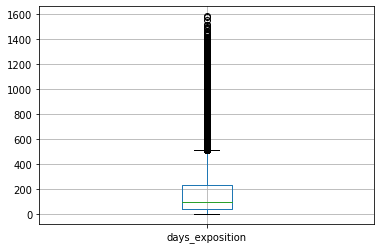

In [57]:
df.boxplot(column='days_exposition')

In [58]:
#определение первого и третьего квартилей
df['days_exposition'].quantile([0.25, 0.75])

0.25     45.0
0.75    232.0
Name: days_exposition, dtype: float64

По гистограмме можно сделать вывод, что необычайно долгий срок продажи более 550 дней, а необычайно быстрый срок -  менее 50 дней(немного больше первого квартиля) 

In [59]:
filtred_by_exposition = df.query('50 < days_exposition < 550')

Составление таблицы со всеми уточнениями

Заполним пустые значения в столбце days_exposition 

In [60]:
good_apartments = df.query(
    'total_area < 350 and last_price < 20000000 and rooms <= 6 and ceiling_height <= 3.5 and (30 < days_exposition < 650 or days_exposition.isna())'
)
good_apartments.shape    

(17743, 29)

Больше половины данных оказалось утеряно, поэтому будем исследовать данные по отдельным отфильтрованным таблицам

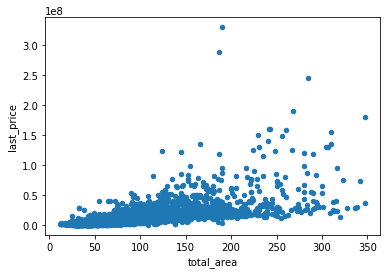

In [61]:
filtred_for_area.plot(kind='scatter', y='last_price', x='total_area')

In [62]:
filtred_for_area['last_price'].corr(filtred_for_area['total_area'])

0.6817720132175236

по диаграмме рассеения и коэффициенту кореляции Пирсона можно сказать, что цена зависит от площади

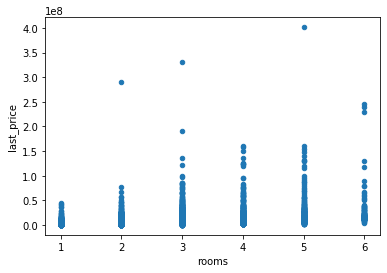

In [63]:
filtred_by_rooms.plot(kind='scatter', x='rooms', y='last_price')

In [64]:
filtred_by_rooms['last_price'].corr(filtred_by_rooms['rooms'])

0.36910280102820514

Цена на недвижимость не сильно зависит от количества комнат, это похоже на правду, мне кажется, на цену больше влияет площадь

Исследование зависимости цены от расстояния до центра

In [65]:
#создадим вспомогательную таблицу и удалим из нее пустые значение в столбце cityCenters_nearest 
help_data = df.copy()
help_data.dropna(subset=['cityCenters_nearest'], inplace=True)

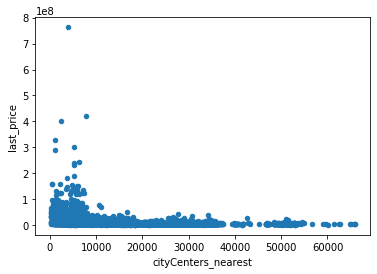

In [66]:
help_data.plot(kind='scatter', y='last_price', x='cityCenters_nearest')

In [67]:
help_data['last_price'].corr(help_data['cityCenters_nearest'])

-0.20662362677657947

Цена на квартиру и расстояние до центра отрицательно кореллируют, хотя коэффициент Пирсона мал, но с приближением к центру
цены растут

Исследование зависимости цены от этажа

In [68]:
def help_func(name):
    if name == 'первый':
        return 1
    elif name == 'другой':
        return 2
    else:
        return 3

In [69]:
df['floor_information_int'] = df['floor_information'].apply(help_func)

Сравним информацию по срезам

In [70]:
df.query('floor_information_int == 1')['last_price'].describe()

count    2.840000e+03
mean     4.867608e+06
std      5.138547e+06
min      4.300000e+05
25%      2.890000e+06
50%      3.950000e+06
75%      5.490000e+06
max      1.350000e+08
Name: last_price, dtype: float64

In [71]:
df.query('floor_information_int == 2')['last_price'].describe()

count    1.710400e+04
mean     6.720294e+06
std      8.660063e+06
min      5.000000e+05
25%      3.600000e+06
50%      4.890000e+06
75%      7.000000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [72]:
df.query('floor_information_int == 3')['last_price'].describe()

count    3.272000e+03
mean     7.450539e+06
std      2.087912e+07
min      1.219000e+04
25%      3.070000e+06
50%      4.350000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Цена на квартиры не зависит от того, на каком этаже она расположена, нет зависимости между квартилями в разных группах, нет зависимости между минимальной и максимальной ценой,к тому же группа 'другой' значительно больше остальных групп

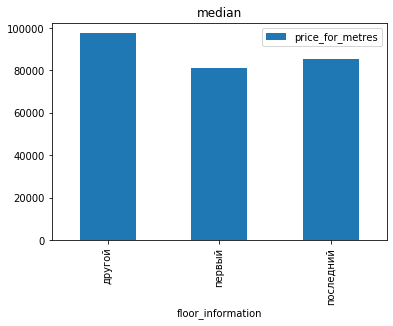

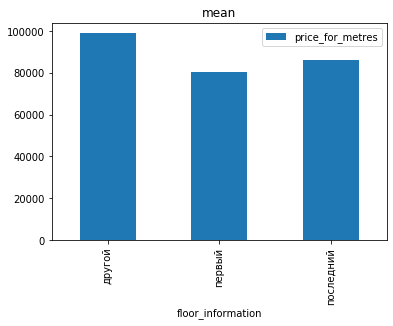

In [73]:
for func in ['median', 'mean']:
    good_apartments.pivot_table(
        index='floor_information', values='price_for_metres', aggfunc=func).plot(kind='bar', title=func)
    plt.show()

Исследование зависимости от даты размещения, дня недели, месяца и года, добавим столбец с временем года

In [74]:
season_dict = {1:'зима', 2:'весна', 3:'лето', 4:'осень'}

In [75]:
def season(month):
    if month in [1, 2, 12]:
        return 1
    elif month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8]:
        return 3
    else:
        return 4
    

In [76]:
good_apartments['season'] = good_apartments['month_publication'].apply(season)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


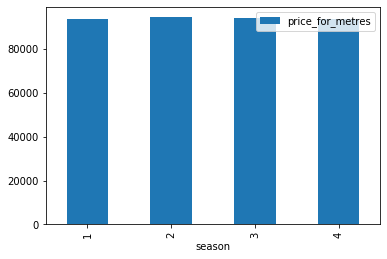

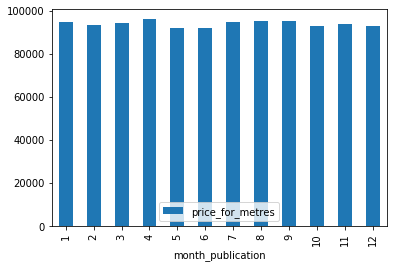

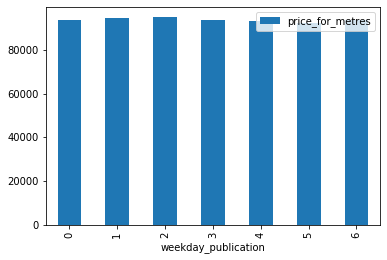

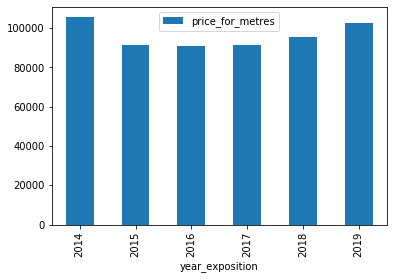

In [77]:
for group in ['season', 'month_publication', 'weekday_publication', 'year_exposition']:
    good_apartments.pivot_table(index=group, values='price_for_metres', aggfunc='median').plot(kind='bar')
    plt.show()

In [78]:
most_amount_apartment = good_apartments['locality_name'].value_counts().head(10)
most_amount_apartment

Санкт-Петербург      11430
посёлок Мурино         370
посёлок Шушары         348
Всеволожск             338
Пушкин                 290
Колпино                262
посёлок Парголово      258
Гатчина                248
деревня Кудрово        218
Выборг                 198
Name: locality_name, dtype: int64

In [79]:
most_amount_table = good_apartments.query('locality_name in @most_amount_apartment.index')
most_amount_table

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_metres,weekday_publication,month_publication,year_exposition,floor_information,living_to_total,kitchen_to_total,season
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,0,...,755.0,NaN,120370,3,3,2019,другой,0.47,0.23,2
1,7,3350000,40,2018-12-04,1,2.6,11,18,1,0,...,NaN,81.0,83750,1,12,2018,первый,0.45,0.28,1
2,10,5196000,56,2015-08-20,2,2.7,5,34,4,0,...,574.0,558.0,92785,3,8,2015,другой,0.61,0.14,3
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,0,...,48.0,121.0,100000,1,6,2018,другой,0.32,0.41,3
6,6,3700000,37,2017-11-02,1,2.6,26,10,6,0,...,NaN,155.0,100000,3,11,2017,другой,0.27,0.38,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23200,11,2350000,35,2016-06-23,1,2.5,5,17,4,False,...,NaN,40.0,67142,3,6,2016,другой,0.49,0.23,3
23204,8,3300000,31,2017-04-29,1,2.6,9,18,6,0,...,317.0,193.0,106451,5,4,2017,другой,0.58,0.19,2
23205,6,3200000,39,2017-12-16,1,2.7,9,20,6,0,...,NaN,38.0,82051,5,12,2017,другой,0.51,0.28,1
23209,11,9470000,72,2016-10-13,2,2.8,25,40,7,0,...,806.0,519.0,131527,3,10,2016,другой,0.56,0.14,4


In [80]:
grouped_table = most_amount_table.pivot_table(
    index='locality_name', values='price_for_metres', aggfunc=['mean', 'max', 'min', 'median']
)
grouped_table

,mean,max,min,median
,price_for_metres,price_for_metres,price_for_metres,price_for_metres
locality_name,,,,
Всеволожск,67602.292899,137333,31400,65912.5
Выборг,57999.954545,107473,18750,57554.0
Гатчина,68938.532258,146315,10507,67741.0
Колпино,75227.507634,125000,51851,74349.5
Пушкин,101963.786207,168539,59836,100000.0
Санкт-Петербург,109194.297113,387096,15384,104255.0
деревня Кудрово,93391.027523,142857,54336,92619.5
посёлок Мурино,85481.597297,130000,53424,85402.5


Самая высокая средняя и медианная цена за квадратный метр недвижимости в Питере, самая низкая медианная и средняя цена в Выборге

In [81]:
spb_table = good_apartments.query('locality_name == "Санкт-Петербург"')
spb_table

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_metres,weekday_publication,month_publication,year_exposition,floor_information,living_to_total,kitchen_to_total,season
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,0,...,755.0,NaN,120370,3,3,2019,другой,0.47,0.23,2
2,10,5196000,56,2015-08-20,2,2.7,5,34,4,0,...,574.0,558.0,92785,3,8,2015,другой,0.61,0.14,3
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,0,...,48.0,121.0,100000,1,6,2018,другой,0.32,0.41,3
7,5,7915000,71,2019-04-18,2,2.7,24,31,22,0,...,NaN,NaN,111478,3,4,2019,другой,0.44,0.25,2
9,18,5400000,61,2017-02-26,3,2.5,9,43,7,0,...,NaN,289.0,88524,6,2,2017,другой,0.70,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23199,13,5250000,43,2018-05-11,2,2.5,5,29,2,0,...,660.0,80.0,122093,4,5,2018,другой,0.67,0.14,2
23204,8,3300000,31,2017-04-29,1,2.6,9,18,6,0,...,317.0,193.0,106451,5,4,2017,другой,0.58,0.19,2
23205,6,3200000,39,2017-12-16,1,2.7,9,20,6,0,...,NaN,38.0,82051,5,12,2017,другой,0.51,0.28,1
23209,11,9470000,72,2016-10-13,2,2.8,25,40,7,0,...,806.0,519.0,131527,3,10,2016,другой,0.56,0.14,4


In [82]:
#проверка на пустые значения
spb_table.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest          53
cityCenters_nearest       40
parks_around3000           0
parks_nearest           6252
ponds_around3000           0
ponds_nearest           5788
days_exposition         1815
price_for_metres           0
weekday_publication        0
month_publication          0
year_exposition            0
floor_information          0
living_to_total            0
kitchen_to_total           0
season                     0
dtype: int64

В столбце cityCenters_nearest всего 40 пропущенных значений, удалим их, чтобы не мешали анализу

In [83]:
spb_table.dropna(subset=['cityCenters_nearest'], inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
def kilometres(metres):
    kilometres = round(metres / 1000)
    return kilometres

In [85]:
spb_table['cityCenters_nearest_km'] = spb_table['cityCenters_nearest'].apply(kilometres)
spb_table

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_metres,weekday_publication,month_publication,year_exposition,floor_information,living_to_total,kitchen_to_total,season,cityCenters_nearest_km
0,20,13000000,108,2019-03-07,3,2.7,16,51,8,0,...,NaN,120370,3,3,2019,другой,0.47,0.23,2,16
2,10,5196000,56,2015-08-20,2,2.7,5,34,4,0,...,558.0,92785,3,8,2015,другой,0.61,0.14,3,14
4,2,10000000,100,2018-06-19,2,3.0,14,32,13,0,...,121.0,100000,1,6,2018,другой,0.32,0.41,3,8
7,5,7915000,71,2019-04-18,2,2.7,24,31,22,0,...,NaN,111478,3,4,2019,другой,0.44,0.25,2,12
9,18,5400000,61,2017-02-26,3,2.5,9,43,7,0,...,289.0,88524,6,2,2017,другой,0.70,0.10,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23199,13,5250000,43,2018-05-11,2,2.5,5,29,2,0,...,80.0,122093,4,5,2018,другой,0.67,0.14,2,7
23204,8,3300000,31,2017-04-29,1,2.6,9,18,6,0,...,193.0,106451,5,4,2017,другой,0.58,0.19,2,12
23205,6,3200000,39,2017-12-16,1,2.7,9,20,6,0,...,38.0,82051,5,12,2017,другой,0.51,0.28,1,17
23209,11,9470000,72,2016-10-13,2,2.8,25,40,7,0,...,519.0,131527,3,10,2016,другой,0.56,0.14,4,4


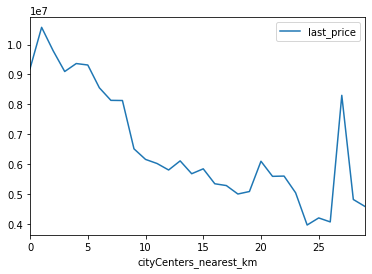

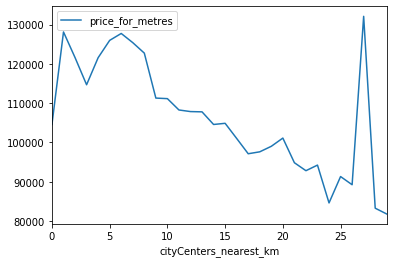

In [86]:
spb_table.pivot_table(index='cityCenters_nearest_km', values='last_price').plot()
plt.show()
spb_table.pivot_table(index='cityCenters_nearest_km', values='price_for_metres').plot()

На графиках зависимости цены и средней цены от расстояния до центра видно, что примерно на расстоянии 3 километров график меняется и цена начинает немного расти, это связано с тем, что она перестает зависеть от расположения и зависит уже от других факторов

In [87]:
spb_center = spb_table.query('cityCenters_nearest_km <= 3')
spb_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_metres,weekday_publication,month_publication,year_exposition,floor_information,living_to_total,kitchen_to_total,season,cityCenters_nearest_km
24,8,6500000,97,2015-10-31,2,2.7,3,46,1,0,...,265.0,67010,5,10,2015,первый,0.47,0.20,4,2
99,32,9600000,90,2017-09-26,4,2.7,5,67,2,0,...,104.0,106666,1,9,2017,другой,0.74,0.09,4,3
137,8,4800000,40,2017-11-18,2,2.7,3,29,2,0,...,80.0,120000,5,11,2017,другой,0.72,0.15,4,3
177,2,7900000,71,2017-08-23,3,3.0,5,38,1,0,...,NaN,111267,2,8,2017,первый,0.54,0.17,3,3
202,11,9000000,72,2018-09-08,2,2.9,5,43,4,0,...,NaN,125000,5,9,2018,другой,0.60,0.15,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,7,5600000,50,2017-08-21,1,2.7,5,27,1,0,...,45.0,112000,0,8,2017,первый,0.54,0.20,3,3
22923,16,15300000,97,2017-01-11,3,3.5,7,61,2,0,...,391.0,157731,2,1,2017,другой,0.63,0.09,1,1
22972,4,6300000,52,2015-05-28,3,3.2,5,29,2,0,...,505.0,121153,3,5,2015,другой,0.56,0.15,2,3
23122,0,8700000,73,2019-01-23,3,2.6,4,45,4,0,...,34.0,119178,2,1,2019,последний,0.62,0.14,1,2


In [88]:
#информация для центра Питера
spb_center.loc[:,['total_area', 'last_price', 'price_for_metres', 'rooms', 'ceiling_height', 'cityCenters_nearest_km']].describe()

,total_area,last_price,price_for_metres,rooms,ceiling_height,cityCenters_nearest_km
count,512.000000,5.120000e+02,512.000000,512.000000,512.000000,512.000000
mean,84.011719,9.622329e+06,119523.941406,2.884766,2.945898,2.230469
std,33.235386,3.710981e+06,36953.661360,1.152043,0.280869,0.809441
min,12.000000,2.400000e+06,29072.000000,1.000000,2.500000,0.000000
25%,61.000000,6.897500e+06,94804.250000,2.000000,2.700000,2.000000
50%,80.000000,8.925000e+06,111329.500000,3.000000,2.900000,2.000000
75%,100.000000,1.200000e+07,135773.000000,4.000000,3.200000,3.000000
max,211.000000,1.999900e+07,387096.000000,6.000000,3.500000,3.000000


In [89]:
#информация по всему Питеру
spb_table.loc[:,['total_area', 'last_price', 'price_for_metres', 'rooms', 'ceiling_height', 'cityCenters_nearest_km']].describe()

,total_area,last_price,price_for_metres,rooms,ceiling_height,cityCenters_nearest_km
count,11390.000000,1.139000e+04,11390.000000,11390.000000,11390.000000,11390.000000
mean,59.626427,6.493986e+06,109130.337840,2.104214,2.717577,11.958736
std,25.576547,3.273555e+06,27164.744214,0.983457,0.185496,4.721673
min,12.000000,1.200000e+06,15384.000000,1.000000,1.800000,0.000000
25%,42.000000,4.200000e+06,90909.000000,1.000000,2.600000,9.000000
50%,54.000000,5.450000e+06,104166.000000,2.000000,2.700000,12.000000
75%,71.000000,7.700000e+06,121951.000000,3.000000,2.700000,15.000000
max,263.000000,1.999900e+07,387096.000000,6.000000,3.500000,29.000000


In [90]:
spb_center.loc[:,['total_area', 'last_price', 'price_for_metres', 'rooms', 'ceiling_height', 'cityCenters_nearest_km']].corr()

,total_area,last_price,price_for_metres,rooms,ceiling_height,cityCenters_nearest_km
total_area,1.000000,0.701168,-0.341922,0.791634,0.172455,-0.066952
last_price,0.701168,1.000000,0.365780,0.504179,0.131264,-0.138556
price_for_metres,-0.341922,0.365780,1.000000,-0.344225,-0.035440,-0.116759
rooms,0.791634,0.504179,-0.344225,1.000000,0.137336,-0.053309
ceiling_height,0.172455,0.131264,-0.035440,0.137336,1.000000,-0.050063
cityCenters_nearest_km,-0.066952,-0.138556,-0.116759,-0.053309,-0.050063,1.000000


In [91]:
spb_table.loc[:,['total_area', 'last_price', 'price_for_metres', 'rooms', 'ceiling_height', 'cityCenters_nearest_km']].corr()

,total_area,last_price,price_for_metres,rooms,ceiling_height,cityCenters_nearest_km
total_area,1.000000,0.823927,-0.018845,0.788629,0.356724,-0.288353
last_price,0.823927,1.000000,0.511370,0.545430,0.404237,-0.389344
price_for_metres,-0.018845,0.511370,1.000000,-0.225596,0.215396,-0.312442
rooms,0.788629,0.545430,-0.225596,1.000000,0.192253,-0.231122
ceiling_height,0.356724,0.404237,0.215396,0.192253,1.000000,-0.396773
cityCenters_nearest_km,-0.288353,-0.389344,-0.312442,-0.231122,-0.396773,1.000000


И в центре и на окраинах на цену влияет количество комнат, площадь и удаленность от центра
Вне центральной части города эти факторы оказывают большее влияние на цену, чем в центральной части
Можно сделать вывод, что цена больше зависит от расстояния при отдалении от центра, чем при приближении к нему, цена на квартиры в центре города не зависит от расстояния до центра потому что вся центральная часть Питера примерно в одинаковой степени благоустроена и нет разницы, один километр до центра или два

## Общий вывод

Цена квартиры в первую очередь зависит от города, в котором она расположена(цены в Питере сильно отличаются от цен в Выборге(115301.6 за квадратный метр в Питере и 58295.7 в Выборге)) и не зависит от даты публикации. Так же в центральной и нецентральной части города цена на квартиру, в зависимости от факторов, формируется по разному. 

Коэффициенты корелляции Пирсона для центральной части:
цена-площадь 0.56
цена-количество комнат 0.24
цена-удаленность от центра -0.18

Коэффициенты корелляции Пирсона для нецентральной части:
цена-площадь 0.65
цена-количество комнат 0.37
цена-удаленность от центра -0.25